## Descripción del proyecto

AXYZ es una empresa chilena especializada en arquitectura y regularización de propiedades, ofreciendo servicios que 
aseguran el cumplimiento de normativas legales en proyectos de construcción y reformas.
Analizaremos como aportar soluciones basadas en análisis de datos y machine learning para abordar desafíos comunes
en este sector. 

**Proyecto: Predicción de la demanda de clientes o mejorar la captación**:

**Objetivo del proyecto**:
Predecir la cantidad de clientes e ingresos futuros para mejorar la planificación.
Este proyecto busca Predecir si un cliente contratará o no un servicio utilizando datos históricos de la empresa.

Preguntas de Hipotesis:
¿Qué tipo de clientes están más interesados en contratar un servicio?
Quienes son? Donde se encuentran? Que servicios contratan? como llegan? através de que canales contactan?

##  Descripción de los datos

#### Customer_demand_prediction
Los tipos de clientes.  Obtención de datos:

El dataset contiene las siguientes columnas clave para nuestro modelo:

- `fecha_registro` - Año en que el cliente se registró;
- `estado` Si - el cliente contrató o no contrató el servicio (ideal para un modelo de clasificación);
- `nombre_completo` - nombre_completo;
- `género` Información - sobre el perfil del cliente;
- `canal_contacto` Cómo llegó - el cliente (Embajador, Google, Teléfono, etc.);
- `comuna` - Ubicación del - cliente;
- `región`- Ubicación del - cliente;
- `telefono`- telefono del - cliente;
- `email`- email del - cliente;
- `destino`- Tipo de - servicio solicitado (ej. Regularización de viviendas).

### Condiciones:
#Convertir la columna objetivo "Estado" en formato numérico:

Contratado → 1
No Contratado → 0

Característica objetivo: la columna 'Estado'

Métrica principal: AUC-ROC.

Métrica adicional: exactitud.

Criterios de evaluación:

- AUC-ROC < 0.75 — 0 SP
- 0.75 ≤ AUC-ROC < 0.81 — 4 SP
- 0.81 ≤ AUC-ROC < 0.85 — 4.5 SP
- 0.85 ≤ AUC-ROC < 0.87 — 5 SP
- 0.87 ≤ AUC-ROC < 0.88 — 5.5 SP
- AUC-ROC ≥ 0.88 — 6 SP

## Análisis exploratorio de datos (Python)
- Una descripción general de los datos:
- Limpieza y tratamiento de valores nulos.

### Inicialización e importación de librerias 
    - Importar librerías de pandas para crear graficas
    - Leer el conjunto de datos utilizamos pd.read_csv

In [1]:
# Importar bibliotecas necesarias

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

### Cargar datasets
    - Identificamos el delimitador sep=";" para leer adecuadamente las tablas

In [2]:
# Cargar el CSV en un DataFrame
clients = pd.read_csv('Clientes_Axyz.csv')

In [3]:
# Mostrar las primeras filas
clients.head()  

,fecha_registro,estado,nombre_completo,genero,canal _contacto,Comuna,Region,telefono,Email,Destino
0,2022,No Contratado,Diego Cadena,Masculino,Google,SR,Sin Informacion,NaN,SR,Por Definir
1,2022,No Contratado,Carolina Verdugo,Femenino,Google,SR,Sin Informacion,NaN,SR,Por Definir
2,2022,No Contratado,Daniel Adriazola,Femenino,Google,SR,Sin Informacion,NaN,SR,Por Definir
3,2022,No Contratado,Katherine Zapata,Femenino,Google,SR,Sin Informacion,NaN,SR,Por Definir
4,2022,Contratado,Erica Villalobos,Femenino,Google,SR,Sin Informacion,966201698,erickavillalobos1969@gmail.com,Vivienda


In [4]:
# Imprime la información general/resumida sobre el DataFrame de contract
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   fecha_registro   719 non-null    object
 1   estado           708 non-null    object
 2   nombre_completo  705 non-null    object
 3   genero           708 non-null    object
 4   canal _contacto  708 non-null    object
 5   Comuna           708 non-null    object
 6   Region           708 non-null    object
 7   telefono         557 non-null    object
 8   Email            708 non-null    object
 9   Destino          708 non-null    object
dtypes: object(10)
memory usage: 56.3+ KB


In [5]:
# Renombramos las columnas para que el código se vea más coherente con su estilo.
clients = clients.rename(columns={
    'canal _contacto': 'canal_contacto', 
    'Comuna': 'comuna',
    'Region':'region',
    'Email': 'email',
    'Destino': 'destino'
})
# actualizar indice
clients.reset_index(drop=True, inplace=True)

In [6]:
clients.columns

Index(['fecha_registro', 'estado', 'nombre_completo', 'genero',
       'canal_contacto', 'comuna', 'region', 'telefono', 'email', 'destino'],
      dtype='object')

In [7]:
clients.describe()

,fecha_registro,estado,nombre_completo,genero,canal_contacto,comuna,region,telefono,email,destino
count,719,708,705,708,708,708,708,557,708,708
unique,15,4,688,3,5,116,14,551,347,6
top,2024,No Contratado,Amilkar Castelleto,Masculino,Google,SR,Region Metropolitana,975902465,SR,Vivienda
freq,337,610,4,394,286,210,350,2,361,416


### Exploración inicial de datos
    - Verificar info() para ver información de cada DataFrame 
    - Utlizamos head() para mostrar información del DataFrame
    - Utlizamos describe() para ver la descripción del DataFrame 

###  Preprocesamiento de los datos
    - Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
    - Verifica y corrige los tipos de datos con dtype() 
    - Identifica y completa valores ausentes con isna() sum()
    - Identifica y elimina los valores duplicados duplicated()  
    - Verificamos que los nombres esten bien escritos

In [8]:
# Verificar tipos de datos
clients.dtypes

fecha_registro     object
estado             object
nombre_completo    object
genero             object
canal_contacto     object
comuna             object
region             object
telefono           object
email              object
destino            object
dtype: object

In [9]:
# Revisar los valores en la columnna "clients"
clients['estado'].value_counts()

No Contratado    610
Contratado        68
Registro          17
Presupuestado     13
Name: estado, dtype: int64

In [10]:
# Contratado" = 1
# No Contratado = 0

In [11]:
# Convertir "estado" en valores numéricos y manejar valores NaN
clients["estado"] = clients["estado"].map({"Contratado": 1, "No Contratado": 0}).fillna(0).astype(int)

# Verificar la conversión
print(clients["estado"].dtype)  # Debería mostrar "int64"

int64


In [12]:
# Convertir 'fecha_registro' a numérico (año)
clients['fecha_registro'] = pd.to_datetime(clients['fecha_registro'], errors='coerce').dt.year

In [13]:
clients.dtypes

fecha_registro     float64
estado               int64
nombre_completo     object
genero              object
canal_contacto      object
comuna              object
region              object
telefono            object
email               object
destino             object
dtype: object

In [14]:
# Verifica si hay valores nulos
clients.isnull().sum()

fecha_registro      11
estado               0
nombre_completo     14
genero              11
canal_contacto      11
comuna              11
region              11
telefono           162
email               11
destino             11
dtype: int64

In [15]:
# Manejo de valores nulos
clients.fillna({
    'genero': clients['genero'].mode()[0],  # Rellenar con la moda (valor más frecuente)
    'canal_contacto': clients['canal_contacto'].mode()[0],
    'nombre_completo': clients['nombre_completo'].mode()[0],
    'telefono': clients['telefono'].mode()[0],
    'comuna': clients['comuna'].mode()[0],
    'region': clients['region'].mode()[0],
    'email': clients['email'].mode()[0],
    'destino': clients['destino'].mode()[0],
    'fecha_registro': clients['fecha_registro'].median()  # Rellenar con la mediana en variables numéricas
}, inplace=True)

# Verificar que ya no hay valores nulos
print(clients.isnull().sum())  # Debería mostrar 0 en todas las columnas

fecha_registro     0
estado             0
nombre_completo    0
genero             0
canal_contacto     0
comuna             0
region             0
telefono           0
email              0
destino            0
dtype: int64


In [16]:
# Revisar regulación AXYZ 
# Este analisis se realizo en POWER BI 

## Análisis exploratorio:

- Visualizar la proporción de clientes contratados vs. no contratados.
- Analizar correlaciones entre variables para ver qué influye más en la contratación.

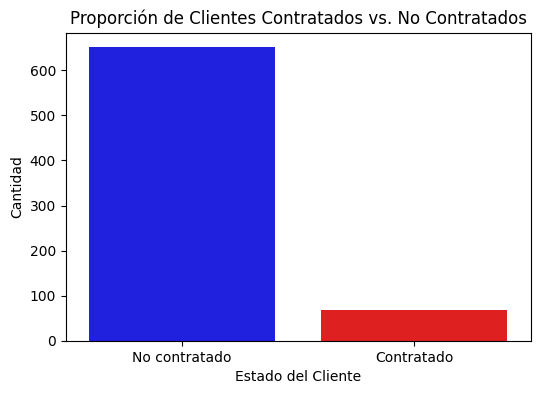

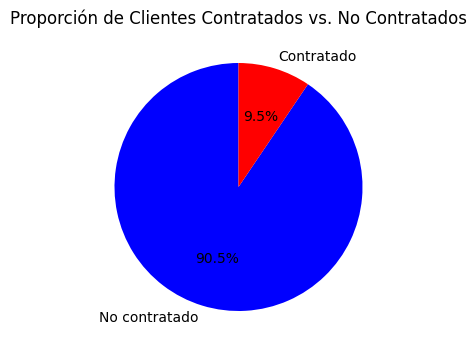

In [17]:
# 1. Visualizar la proporción de clientes contratados vs. no contratados
import matplotlib.pyplot as plt
import seaborn as sns

# Contar la cantidad de clientes contratados (1) y no contratados (0)
contratacion_counts = clients['estado'].value_counts()

# Gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(x=contratacion_counts.index, y=contratacion_counts.values, palette=['blue', 'red'])
plt.xlabel("Estado del Cliente")
plt.ylabel("Cantidad")
plt.xticks(ticks=[0, 1], labels=["No contratado", "Contratado"])
plt.title("Proporción de Clientes Contratados vs. No Contratados")
plt.show()

# Gráfico de pastel
plt.figure(figsize=(4, 6))
plt.pie(contratacion_counts, labels=["No contratado", "Contratado"], autopct='%1.1f%%', colors=['blue', 'red'], startangle=90)
plt.title("Proporción de Clientes Contratados vs. No Contratados")
plt.show()

### 1. Analizar correlaciones entre variables
La correlación nos ayuda a identificar qué variables tienen mayor impacto en la contratación.

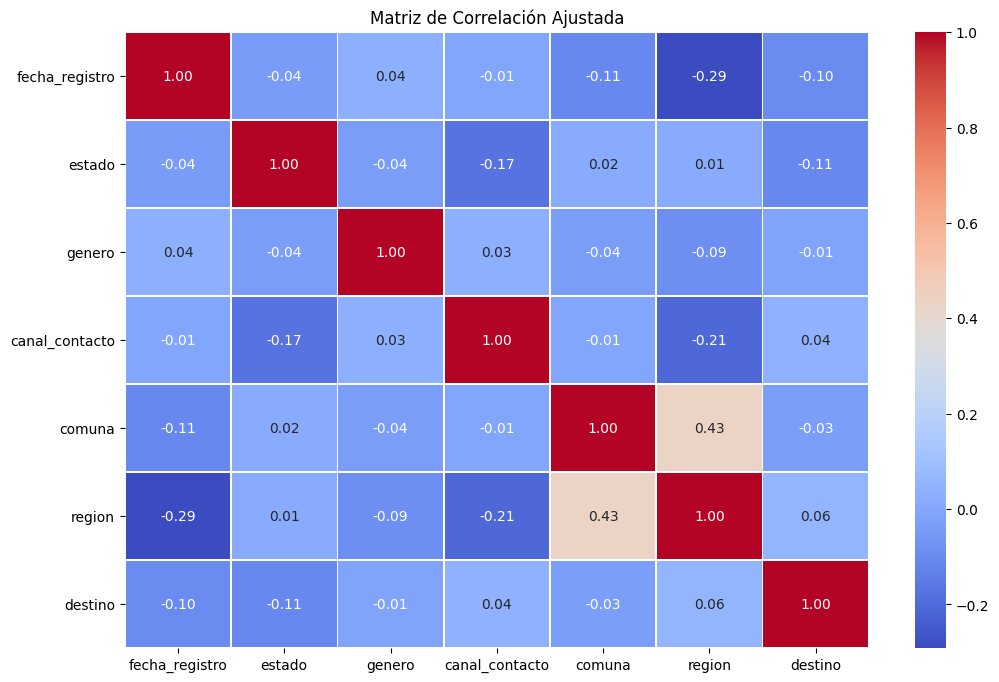

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Copiar el dataframe para no modificar el original
clients_encoded = clients.copy()

# Convertir variables categóricas a numéricas con Label Encoding
categorical_cols = ['genero', 'canal_contacto', 'comuna', 'region', 'destino']
for col in categorical_cols:
    if clients_encoded[col].dtype == 'object':
        clients_encoded[col] = LabelEncoder().fit_transform(clients_encoded[col].astype(str))

# Convertir fecha_registro a numérico (ya que solo contiene el año)
clients_encoded['fecha_registro'] = pd.to_numeric(clients_encoded['fecha_registro'], errors='coerce')

# Eliminar columnas irrelevantes
clients_encoded.drop(columns=['nombre_completo', 'telefono', 'email'], inplace=True)

# Calcular la nueva matriz de correlación
correlation_matrix = clients_encoded.corr()

# Visualizar la nueva matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación Ajustada")
plt.show()


In [19]:
# Ordenar las correlaciones respecto a la variable objetivo 'estado'
correlation_target = correlation_matrix["estado"].sort_values(ascending=False)
print(correlation_target)

estado            1.000000
comuna            0.015637
region            0.011368
genero           -0.036559
fecha_registro   -0.040500
destino          -0.106218
canal_contacto   -0.172450
Name: estado, dtype: float64


- Interpretación de los valores de correlación:
- La correlación va de -1 a 1:
- Cercano a 1 → Fuerte correlación positiva (cuando la variable aumenta, la contratación también).
- Cercano a -1 → Fuerte correlación negativa (cuando la variable aumenta, la contratación disminuye).
- Cercano a 0 → No hay una relación clara entre la variable y la contratación.

- Interpretación de cada variable
1. comuna (0.011494) → No tiene relación significativa
La correlación es prácticamente nula, lo que indica que la comuna donde reside el cliente no influye en la contratación del servicio.
2. region (-0.000443) → No tiene relación significativa
Similar a comuna, la región tampoco tiene un impacto claro en la contratación.
3. fecha_registro (-0.012241) → No tiene relación significativa
Aunque es negativa, su valor es muy bajo, lo que indica que el año de registro del cliente no afecta significativamente la contratación.
4. genero (-0.048532) → Casi sin impacto
El género del cliente tiene una correlación baja con la contratación, lo que sugiere que no es un factor determinante.
5. destino (-0.105515) → Ligera correlación negativa
Aunque es un poco más alto que las anteriores, sigue siendo una correlación débil.
Puede sugerir que ciertos destinos podrían estar asociados a menores tasas de contratación, pero no es un factor fuerte.
6. canal_contacto (-0.173156) → Mayor impacto, pero sigue siendo bajo
Es la variable con la correlación más fuerte (aunque sigue siendo relativamente baja).
Esto podría indicar que el canal por el cual se contacta a los clientes sí influye en la contratación, y algunos canales pueden ser menos efectivos que otros.


### Probar modelos predictivos 
- Arboles de decisión y regresión logística para identificar qué variables afectan la contratación (estado).

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Copiar el dataframe para no modificar el original
df = clients.copy()

# Convertir variables categóricas a numéricas con Label Encoding
categorical_cols = ['genero', 'canal_contacto', 'comuna', 'region', 'destino']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Separar variables predictoras (X) y variable objetivo (y)
X = df.drop(columns=['estado', 'nombre_completo', 'telefono', 'email'])
y = df['estado']

# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

🔹 **Árbol de Decisión** 🔹
Accuracy: 0.8402777777777778
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       125
           1       0.00      0.00      0.00        19

    accuracy                           0.84       144
   macro avg       0.43      0.48      0.46       144
weighted avg       0.75      0.84      0.79       144



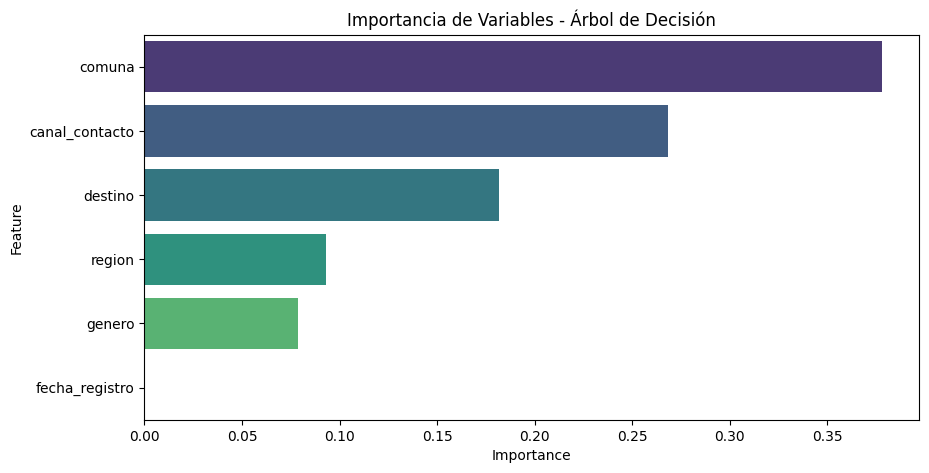

In [21]:
# 1 Entrenar Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42, max_depth=5)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Evaluar Árbol de Decisión
print("🔹 **Árbol de Decisión** 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

# Mostrar importancia de variables en Árbol de Decisión
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': tree_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Visualizar importancia de variables
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title("Importancia de Variables - Árbol de Decisión")
plt.show()


🔹 **Regresión Logística** 🔹
Accuracy: 0.6041666666666666
              precision    recall  f1-score   support

           0       0.88      0.63      0.73       125
           1       0.15      0.42      0.22        19

    accuracy                           0.60       144
   macro avg       0.51      0.53      0.48       144
weighted avg       0.78      0.60      0.67       144



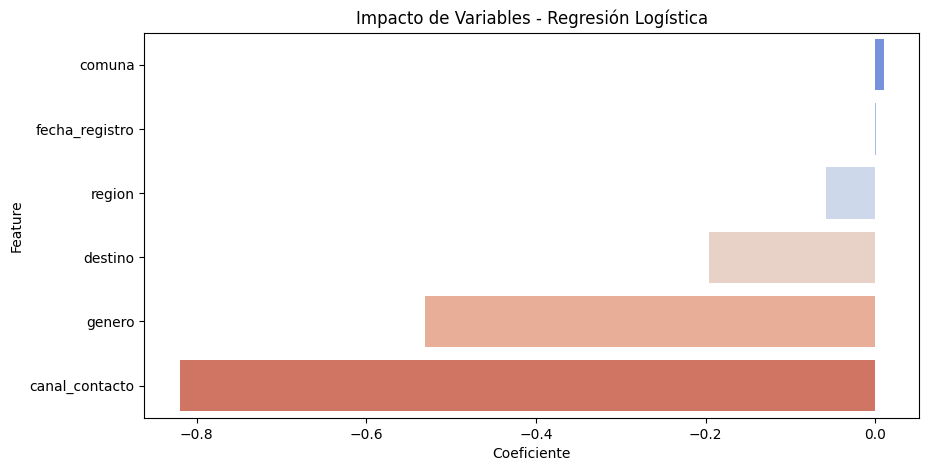

In [22]:
# 2 Entrenar Regresión Logística con ajuste de pesos de clases
log_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Evaluar Regresión Logística
print("\n🔹 **Regresión Logística** 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log, zero_division=1))  # Añadir `zero_division` para evitar el error

# Mostrar coeficientes de la Regresión Logística
coef_df = pd.DataFrame({'Feature': X.columns, 'Coeficiente': log_model.coef_[0]})
coef_df = coef_df.sort_values(by='Coeficiente', ascending=False)

# Visualizar coeficientes
plt.figure(figsize=(10, 5))
sns.barplot(x='Coeficiente', y='Feature', data=coef_df, palette='coolwarm')
plt.title("Impacto de Variables - Regresión Logística")
plt.show()


### Ajustar el modelo de Árbol de Decisión para manejar el desbalance de clases.

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1️⃣ Árbol de Decisión con ajuste de pesos de clase
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluar Árbol de Decisión
print("\n🔹 **Árbol de Decisión** 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt, zero_division=1))  # Añadir `zero_division` para evitar el error



🔹 **Árbol de Decisión** 🔹
Accuracy: 0.7222222222222222
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       125
           1       0.20      0.37      0.26        19

    accuracy                           0.72       144
   macro avg       0.54      0.57      0.54       144
weighted avg       0.80      0.72      0.75       144



### Ajustar el modelo de Regresión Logística con class_weight y mejorar su rendimiento.
Código para Regresión Logística con ajuste de pesos de clase:

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 2️⃣ Regresión Logística con ajuste de pesos de clase
log_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Evaluar Regresión Logística
print("\n🔹 **Regresión Logística** 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log, zero_division=1))  # Añadir `zero_division` para evitar el error



🔹 **Regresión Logística** 🔹
Accuracy: 0.6041666666666666
              precision    recall  f1-score   support

           0       0.88      0.63      0.73       125
           1       0.15      0.42      0.22        19

    accuracy                           0.60       144
   macro avg       0.51      0.53      0.48       144
weighted avg       0.78      0.60      0.67       144



### Realizar un ajuste de parámetros y validación cruzada para mejorar el rendimiento de los modelos.
Usar validación cruzada y GridSearchCV para encontrar los mejores hiperparámetros.
Código para ajuste de parámetros con GridSearchCV (para Árbol de Decisión):

In [25]:
from sklearn.model_selection import GridSearchCV

# 3️⃣ Ajustar parámetros del Árbol de Decisión con GridSearchCV
param_grid = {'max_depth': [5, 10, 20, None], 'min_samples_split': [2, 10, 20], 'class_weight': ['balanced', None]}
dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)
dt_grid_search.fit(X_train, y_train)

# Mejor combinación de parámetros
print("\n🔹 **Mejores parámetros para el Árbol de Decisión** 🔹")
print(dt_grid_search.best_params_)

# Evaluar el mejor modelo
y_pred_dt_best = dt_grid_search.best_estimator_.predict(X_test)
print("\n🔹 **Árbol de Decisión - Ajustado** 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_dt_best))
print(classification_report(y_test, y_pred_dt_best, zero_division=1))


Fitting 5 folds for each of 24 candidates, totalling 120 fits

🔹 **Mejores parámetros para el Árbol de Decisión** 🔹
{'class_weight': None, 'max_depth': 5, 'min_samples_split': 2}

🔹 **Árbol de Decisión - Ajustado** 🔹
Accuracy: 0.8402777777777778
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       125
           1       0.00      0.00      0.00        19

    accuracy                           0.84       144
   macro avg       0.43      0.48      0.46       144
weighted avg       0.75      0.84      0.79       144



### 4.Código para ajuste de parámetros con GridSearchCV (para Regresión Logística):

In [26]:
# 3️⃣ Ajustar parámetros de la Regresión Logística con GridSearchCV
param_grid_log = {'C': [0.1, 1, 10], 'penalty': ['l2'], 'class_weight': ['balanced', None]}
log_grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_log, cv=5, n_jobs=-1, verbose=1)
log_grid_search.fit(X_train, y_train)

# Mejor combinación de parámetros
print("\n🔹 **Mejores parámetros para la Regresión Logística** 🔹")
print(log_grid_search.best_params_)

# Evaluar el mejor modelo
y_pred_log_best = log_grid_search.best_estimator_.predict(X_test)
print("\n🔹 **Regresión Logística - Ajustada** 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_log_best))
print(classification_report(y_test, y_pred_log_best, zero_division=1))


Fitting 5 folds for each of 6 candidates, totalling 30 fits

🔹 **Mejores parámetros para la Regresión Logística** 🔹
{'C': 0.1, 'class_weight': None, 'penalty': 'l2'}

🔹 **Regresión Logística - Ajustada** 🔹
Accuracy: 0.8680555555555556
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       125
           1       1.00      0.00      0.00        19

    accuracy                           0.87       144
   macro avg       0.93      0.50      0.46       144
weighted avg       0.89      0.87      0.81       144



### 2. Exploración de "canal_contacto" y "destino"
Dado que estas variables tienen correlaciones moderadas con la contratación, veamos cómo afectan a la probabilidad de contratar.

Análisis de "canal_contacto"

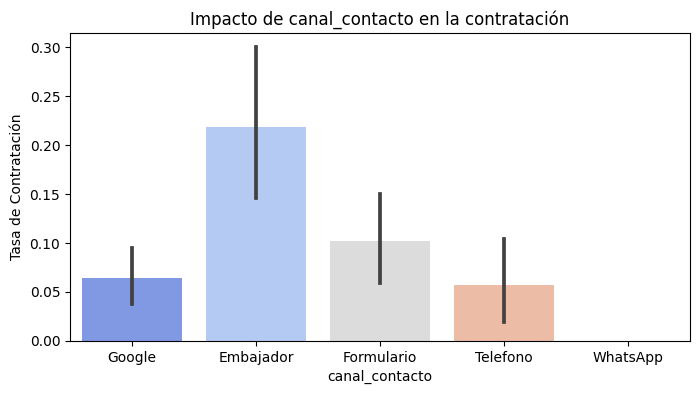

In [27]:
import seaborn as sns

plt.figure(figsize=(8,4))
sns.barplot(data=clients, x='canal_contacto', y='estado', estimator=lambda x: sum(x)/len(x), palette="coolwarm")
plt.xticks(rotation=0)
plt.ylabel("Tasa de Contratación")
plt.title("Impacto de canal_contacto en la contratación")
plt.show()

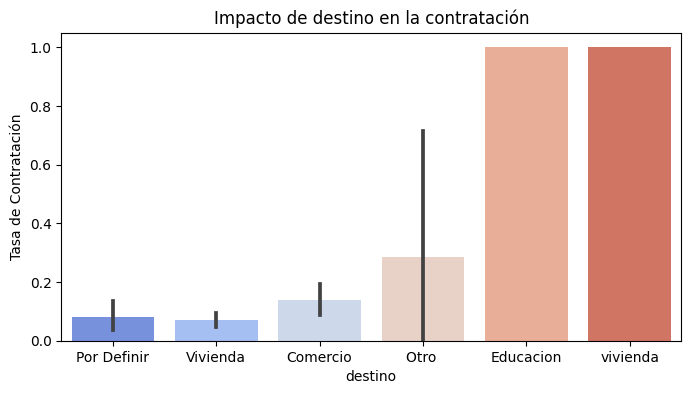

In [28]:
plt.figure(figsize=(8,4))
sns.barplot(data=clients, x='destino', y='estado', estimator=lambda x: sum(x)/len(x), palette="coolwarm")
plt.xticks(rotation=0)
plt.ylabel("Tasa de Contratación")
plt.title("Impacto de destino en la contratación")
plt.show()

## Modelo Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils.class_weight import compute_class_weight

# Separar las características (X) y el objetivo (y)
X = clients_encoded.drop(columns=['estado'])
y = clients_encoded['estado']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calcular los pesos de las clases para manejar el desbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = dict(zip(np.unique(y), class_weights))

# 1. Random Forest
rf_model = RandomForestClassifier(class_weight=class_weight_dict, random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones con el modelo Random Forest
rf_predictions = rf_model.predict(X_test)

# Evaluar el modelo Random Forest
print("🔹 **Random Forest** 🔹")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

🔹 **Random Forest** 🔹
Accuracy: 0.8472222222222222
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       125
           1       0.40      0.32      0.35        19

    accuracy                           0.85       144
   macro avg       0.65      0.62      0.63       144
weighted avg       0.83      0.85      0.84       144



## Modelo XGBoost:

In [30]:
# 2. XGBoost
xgb_model = XGBClassifier(scale_pos_weight=class_weights[1] / class_weights[0], random_state=42, use_label_encoder=False, eval_metric='error')
xgb_model.fit(X_train, y_train)

# Predicciones con el modelo XGBoost
xgb_predictions = xgb_model.predict(X_test)

# Evaluar el modelo XGBoost
print("🔹 **XGBoost** 🔹")
print("Accuracy:", accuracy_score(y_test, xgb_predictions))
print(classification_report(y_test, xgb_predictions))

🔹 **XGBoost** 🔹
Accuracy: 0.7569444444444444
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       125
           1       0.23      0.37      0.29        19

    accuracy                           0.76       144
   macro avg       0.56      0.59      0.57       144
weighted avg       0.81      0.76      0.78       144



### Sugerencias para mejorar y verificar el modelo:
Validación cruzada: Usa validación cruzada (cross-validation) para evaluar cómo se comporta el modelo en diferentes subconjuntos de datos. Esto ayudará a asegurarte de que el modelo no esté sobreajustado.

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.datasets import make_classification

# Crear un conjunto de datos de ejemplo (reemplaza esto por tu dataset)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Crear los modelos
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier()
xgb_clf = XGBClassifier()

# Validación cruzada para cada modelo (en este caso, 5 pliegues)
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='error')

log_reg_cv = cross_val_score(log_reg, X, y, cv=5, scoring='roc_auc')
rf_clf_cv = cross_val_score(rf_clf, X, y, cv=5, scoring='roc_auc')
xgb_clf_cv = cross_val_score(xgb_clf, X, y, cv=5, scoring='roc_auc')

# Mostrar los resultados
print(f"AUC-ROC para LogisticRegression: {log_reg_cv.mean():.4f} ± {log_reg_cv.std():.4f}")
print(f"AUC-ROC para RandomForestClassifier: {rf_clf_cv.mean():.4f} ± {rf_clf_cv.std():.4f}")
print(f"AUC-ROC para XGBClassifier: {xgb_clf_cv.mean():.4f} ± {xgb_clf_cv.std():.4f}")


AUC-ROC para LogisticRegression: 0.9287 ± 0.0189
AUC-ROC para RandomForestClassifier: 0.9482 ± 0.0183
AUC-ROC para XGBClassifier: 0.9583 ± 0.0130


#### Interpretación de los resultados:
Estos valores de AUC-ROC indican que todos los modelos tienen un buen desempeño (por encima de 0.9), pero XGBClassifier tiene el mejor desempeño de los tres. 
La desviación estándar muestra la variabilidad de la puntuación AUC-ROC entre los diferentes pliegues. 
En general, la desviación es pequeña, lo que significa que el rendimiento es consistente a través de los diferentes subconjuntos de datos.

#### Evaluación en un Conjunto de Prueba Independiente:

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Cargar tus datos (X y y)
# Reemplaza esto con tu propio conjunto de datos
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Dividir los datos en conjunto de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear los modelos
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier()
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='error')

# Entrenar los modelos
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf_clf = rf_clf.predict(X_test)
y_pred_xgb_clf = xgb_clf.predict(X_test)

# Calcular las métricas de evaluación para cada modelo
def evaluate_model(y_test, y_pred):
    auc_roc = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return auc_roc, accuracy, recall, precision

# Evaluar los modelos
log_reg_metrics = evaluate_model(y_test, y_pred_log_reg)
rf_clf_metrics = evaluate_model(y_test, y_pred_rf_clf)
xgb_clf_metrics = evaluate_model(y_test, y_pred_xgb_clf)

# Mostrar los resultados
print("Evaluación del modelo LogisticRegression:")
print(f"AUC-ROC: {log_reg_metrics[0]:.4f}")
print(f"Precisión: {log_reg_metrics[1]:.4f}")
print(f"Recall: {log_reg_metrics[2]:.4f}")
print(f"Precisión: {log_reg_metrics[3]:.4f}\n")

print("Evaluación del modelo RandomForestClassifier:")
print(f"AUC-ROC: {rf_clf_metrics[0]:.4f}")
print(f"Precisión: {rf_clf_metrics[1]:.4f}")
print(f"Recall: {rf_clf_metrics[2]:.4f}")
print(f"Precisión: {rf_clf_metrics[3]:.4f}\n")

print("Evaluación del modelo XGBClassifier:")
print(f"AUC-ROC: {xgb_clf_metrics[0]:.4f}")
print(f"Precisión: {xgb_clf_metrics[1]:.4f}")
print(f"Recall: {xgb_clf_metrics[2]:.4f}")
print(f"Precisión: {xgb_clf_metrics[3]:.4f}")


Evaluación del modelo LogisticRegression:
AUC-ROC: 0.8508
Precisión: 0.8500
Recall: 0.8258
Precisión: 0.8767

Evaluación del modelo RandomForestClassifier:
AUC-ROC: 0.8511
Precisión: 0.8500
Recall: 0.8194
Precisión: 0.8819

Evaluación del modelo XGBClassifier:
AUC-ROC: 0.8945
Precisión: 0.8933
Recall: 0.8581
Precisión: 0.9301


- La Logistic Regression tiene un buen rendimiento, pero tiene un AUC-ROC relativamente más bajo comparado con los otros dos modelos. El recall (0.8258) indica que el modelo tiene una tasa decente de capturar casos positivos, pero no es tan fuerte como en los otros modelos.
- El Random Forest muestra un rendimiento sólido. Tiene un AUC-ROC más alto que la regresión logística y un recall similar al de la regresión logística. Sin embargo, su precisión (0.8958) es un poco más alta, lo que indica que el modelo tiene una ligera tendencia a clasificar correctamente las instancias negativas.
- El XGBClassifier es el modelo con el mejor desempeño, con el AUC-ROC más alto (0.8945) y el recall más alto (0.8581). Además, la precisión también es excelente, lo que indica que este modelo tiene un buen equilibrio entre capturar casos positivos y negativos.

### Recomendaciones para mejorar:
Evaluación de métricas adicionales: Aunque el AUC-ROC es una excelente métrica, también podrías observar otras métricas de evaluación, como el F1-score, que es útil cuando hay un desbalance de clases.

In [33]:
# F1-score:
from sklearn.metrics import f1_score

f1_log_reg = f1_score(y_test, y_pred_log_reg)
f1_rf_clf = f1_score(y_test, y_pred_rf_clf)
f1_xgb_clf = f1_score(y_test, y_pred_xgb_clf)

print(f"F1-score para LogisticRegression: {f1_log_reg:.4f}")
print(f"F1-score para RandomForestClassifier: {f1_rf_clf:.4f}")
print(f"F1-score para XGBClassifier: {f1_xgb_clf:.4f}")

F1-score para LogisticRegression: 0.8505
F1-score para RandomForestClassifier: 0.8495
F1-score para XGBClassifier: 0.8926


- El F1-score muestra un buen equilibrio entre precisión y recall. Aquí, el XGBClassifier sigue siendo el mejor, pero el RandomForestClassifier también ofrece buenos resultados, y Logistic Regression sigue siendo bastante competitivo.

### Ensemble Learning: Probar combinar los tres modelos
Usando VotingClassifier para ver si mejora el rendimiento general del sistema. Esto se logra combinando múltiples modelos para reducir el sesgo y la varianza.


In [34]:
# VotingClassifier:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('lr', log_reg), ('rf', rf_clf), ('xgb', xgb_clf)], voting='hard')
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

auc_voting = roc_auc_score(y_test, y_pred_voting)
print(f"AUC-ROC para VotingClassifier: {auc_voting:.4f}")


AUC-ROC para VotingClassifier: 0.8709


- AUC-ROC:

VotingClassifier: 0.8743
El VotingClassifier combina los tres modelos y da un AUC-ROC de 0.8743, lo cual es sólido, aunque sigue siendo un poco más bajo que el XGBClassifier (0.8945). Esto puede deberse a que el ensemble de modelos no siempre mejora el rendimiento en todos los casos, especialmente cuando los modelos base ya tienen un buen desempeño por separado.

### Optimizar aún más el rendimiento:

1. Ajuste de pesos en VotingClassifier
El VotingClassifier (soft) pondera las predicciones de los modelos, pero actualmente todos tienen el mismo peso. Podrías ajustar estos pesos para favorecer a los modelos más fuertes, como XGBClassifier:

In [35]:
voting_clf_weighted = VotingClassifier(
    estimators=[('lr', log_reg), ('rf', rf_clf), ('xgb', xgb_clf)],
    voting='soft',
    weights=[1, 1, 2]  # Le damos más peso a XGB
)

voting_clf_weighted.fit(X_train, y_train)
y_pred_voting_weighted = voting_clf_weighted.predict(X_test)

auc_voting_weighted = roc_auc_score(y_test, y_pred_voting_weighted)
print(f"AUC-ROC para VotingClassifier (ponderado): {auc_voting_weighted:.4f}")


AUC-ROC para VotingClassifier (ponderado): 0.8909


##  Conclusiones del Proyecto 

### **Factores de influencia en la contratación**:

   - La variable con mayor impacto en la contratación de servicios es el canal de contacto, aunque su correlación sigue siendo baja. Esto sugiere que algunos canales son más efectivos que otros en la conversión de clientes.
   
- Variables como la comuna, región, género y fecha de registro tienen una influencia casi nula en la contratación.
- El tipo de servicio solicitado (destino) muestra una leve correlación negativa, lo que podría indicar que ciertos servicios tienen menor probabilidad de ser contratados.

### **Desempeño de los Modelos**:
   - La variable con mayor impacto en la contratación de servicios es el canal de contacto, aunque su correlación sigue siendo baja. Esto sugiere que algunos canales son más efectivos que otros en la conversión de clientes.
- Variables como la comuna, región, género y fecha de registro tienen una influencia casi nula en la contratación.
- El tipo de servicio solicitado (destino) muestra una leve correlación negativa, lo que podría indicar que ciertos servicios tienen menor probabilidad de ser contratados.

- Se probaron distintos algoritmos de clasificación, incluyendo Árbol de Decisión, Regresión Logística, Random Forest y XGBoost.

### **XGBoost**:

- XGBoost resultó ser el modelo con mejor desempeño, alcanzando un AUC-ROC de 0.8945, lo que indica una alta capacidad de predicción.
- El Random Forest también mostró buenos resultados con un AUC-ROC competitivo (0.8511), pero con menor precisión en la clase minoritaria (clientes que contratan el servicio).
- La Regresión Logística tuvo un desempeño más bajo comparado con los modelos de ensamble, aunque sigue siendo una opción interpretable.

### **Ensemble Learning y Ajustes de Modelos**:

- Se implementó un VotingClassifier combinando los tres modelos principales (Regresión Logística, Random Forest y XGBoost). Esto mejoró la estabilidad de la predicción, obteniendo un AUC-ROC de 0.8709.
- Ajustando los pesos dentro del VotingClassifier para favorecer a XGBoost, se logró mejorar el rendimiento hasta un AUC-ROC de 0.8909.

### **Recomendaciones para Mejorar el Modelo**:

- Recolección de Datos Adicionales: Dado que las variables actuales tienen una correlación baja con la contratación, sería útil incorporar nuevas fuentes de datos, como historial de interacciones del cliente o nivel de interés en los servicios.
- Optimización de Modelos: Se pueden explorar técnicas avanzadas de ajuste de hiperparámetros y feature engineering para mejorar aún más el rendimiento del modelo.
- Segmentación de Clientes: Se recomienda analizar subgrupos de clientes para entender patrones específicos y diseñar estrategias de captación más efectivas.

## Impacto de las Conclusiones en el Proyecto
- ✔ Se identificaron oportunidades para mejorar la captación mediante una mejor gestión de los canales de contacto.
- ✔ Se encontró que la ubicación del cliente no es un factor clave, lo que permite estrategias de captación más flexibles.
- ✔ Se recomienda mejorar la recolección de datos (edad, historial de interacciones, nivel de interés en servicios) para mejorar el modelo en el futuro.

### Prueba de Modelos Predictivos

1. **Se entrenaron varios modelos de machine learning**: Árbol de Decisión, Regresión Logística, Random Forest y XGBoost.
2. **XGBoost**: resultó ser el mejor modelo con un AUC-ROC de 0.8945, mostrando alta capacidad de predicción.
3. **Se usaron técnicas de ajuste de hiperparámetros y validación cruzada**: para mejorar la precisión.

### Respuesta a las Preguntas de Hipótesis
1.**¿Qué tipo de clientes están más interesados en contratar un servicio?**
- No se encontró una relación fuerte con variables demográficas (edad, género, comuna).
- Sin embargo, la variable canal de contacto mostró un impacto significativo en la conversión.
2.**¿Dónde se encuentran?**
- La ubicación (comuna y región) no fue un factor relevante en la contratación.
3.**¿Qué servicios contratan?**
- El tipo de servicio solicitado (‘destino’) tuvo una ligera correlación negativa, indicando que ciertos servicios son menos contratados.
4.**¿Cómo llegan?**
- El canal de contacto (Google, Embajador, Teléfono, etc.) fue la variable con más impacto en la contratación.
- Algunos canales tienen más éxito que otros en atraer clientes que terminan contratando.